# To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.                                       Also, if some data pre-processing is necessary do that as well.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\ICT REF\\case study\\10\\mushrooms.csv")

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Data Preprocessing

In [9]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
df.shape

(8124, 23)

# splitting data into feature set and respone variable

In [11]:
x = df.drop(['class'], axis = 1)
y = df[['class']]

In [12]:
x.shape

(8124, 22)

In [13]:
y.shape

(8124, 1)

# encoding

In [14]:
##converting categorical variables to numerical values

In [15]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
var = x.columns
for v in var:
    x[v] = label_enc.fit_transform(x[v])
x = pd.DataFrame(x)
y = label_enc.fit_transform(y)
y = pd.DataFrame(y)

In [16]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [17]:
y.head()

,0
0,1
1,0
2,0
3,1
4,0


# modelling

# splitting data into train and test set

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.20)

In [19]:
x_train.shape

(6499, 22)

In [20]:
y_train.shape

(6499, 1)

In [21]:
x_test.shape

(1625, 22)

In [22]:
y_test.shape

(1625, 1)

# 1. Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)

# Checking accuracy of model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
print('Accuracy score = ', accuracy_score(y_test, log_pred))
print('Precision score = ', precision_score(y_test, log_pred))
print('f1 score = ', f1_score(y_test, log_pred))

Accuracy score =  0.947076923076923
Precision score =  0.9427480916030534
f1 score =  0.9451530612244898


In [30]:
confusion_matrix(y_test, log_pred)

array([[798,  45],
       [ 41, 741]], dtype=int64)

# 2.KNN

[0.9993846153846154, 0.9993846153846154, 0.9981538461538462, 0.9963076923076923, 0.9963076923076923, 0.9969230769230769, 0.9956923076923077, 0.9950769230769231, 0.9950769230769231]


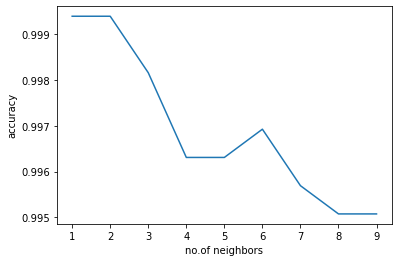

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 10)
acc_values = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    acc_values.append(acc)
print(acc_values)
plt.plot(neighbors, acc_values)
plt.xlabel('no.of neighbors')
plt.ylabel('accuracy')
plt.show()

We take no.of neighbors as 2

In [35]:
kn_model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski')
kn_model.fit(x_train, y_train)
kn_pred = kn_model.predict(x_test)

In [36]:
print('Accuracy score = ', accuracy_score(y_test, kn_pred))
print('Precision score = ', precision_score(y_test, kn_pred))
print('f1 score = ', f1_score(y_test, kn_pred))

Accuracy score =  0.9993846153846154
Precision score =  0.9987228607918263
f1 score =  0.9993610223642173


In [37]:
confusion_matrix(y_test, kn_pred)

array([[842,   1],
       [  0, 782]], dtype=int64)

# 3. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [39]:
print('Accuracy score = ', accuracy_score(y_test, dt_pred))
print('Precision score = ', precision_score(y_test, dt_pred))
print('f1 score = ', f1_score(y_test, dt_pred))

Accuracy score =  1.0
Precision score =  1.0
f1 score =  1.0


In [40]:
confusion_matrix(y_test, dt_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

# 4.Random Forest Algorithm

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

In [42]:
confusion_matrix(y_test, rf_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

In [43]:
print('Accuracy score = ', accuracy_score(y_test, rf_pred))
print('Precision score = ', precision_score(y_test, rf_pred))
print('f1 score = ', f1_score(y_test, rf_pred))

Accuracy score =  1.0
Precision score =  1.0
f1 score =  1.0


In [44]:
pd.Series(rf_model.feature_importances_, index = x.columns).sort_values(ascending = False)*100

odor                        15.066951
gill-size                   11.196693
spore-print-color           10.603423
gill-color                   9.303597
ring-type                    8.665836
stalk-surface-above-ring     6.845039
population                   6.720466
stalk-surface-below-ring     5.244157
bruises                      4.955277
gill-spacing                 4.253958
stalk-root                   3.881977
habitat                      3.180144
stalk-shape                  2.010779
cap-color                    1.652168
stalk-color-above-ring       1.640646
stalk-color-below-ring       1.584271
ring-number                  1.282939
cap-surface                  0.866796
cap-shape                    0.437810
veil-color                   0.370317
gill-attachment              0.236758
veil-type                    0.000000
dtype: float64

We can avoid the column 'veil-type' since it has the least importance

In [45]:
x.drop(['veil-type'], axis = 1, inplace = True)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.20)

In [47]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, rf_pred))
print('Precision score = ', precision_score(y_test, rf_pred))
print('f1 score = ', f1_score(y_test, rf_pred))

Accuracy score =  1.0
Precision score =  1.0
f1 score =  1.0


In [48]:
confusion_matrix(y_test, rf_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

# 5. SVM

In [49]:
from sklearn.svm import SVC
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(x_train, y_train)
rbf_pred = svm_radial.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, rbf_pred))
print('Precision score = ', precision_score(y_test, rbf_pred))
print('f1 score = ', f1_score(y_test, rbf_pred))

Accuracy score =  0.9938461538461538
Precision score =  0.9987080103359173
f1 score =  0.993573264781491


In [50]:
confusion_matrix(y_test, rbf_pred)

array([[842,   1],
       [  9, 773]], dtype=int64)

# 6. Naive Bayes Classifier

In [52]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
nbc_pred = classifier.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, nbc_pred))
print('Precision score = ', precision_score(y_test, nbc_pred))
print('f1 score = ', f1_score(y_test, nbc_pred))

Accuracy score =  0.8073846153846154
Precision score =  0.9106830122591943
f1 score =  0.7686622320768662


In [53]:
confusion_matrix(y_test, nbc_pred)

array([[792,  51],
       [262, 520]], dtype=int64)

By comparing the performance of each model we can conclude that Decision Tree and Random Forest Model are the perfect models for predicting the class of mushrooms
